In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import operator
from itertools import chain

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [10]:
# helpers to deal with various datatypes
def JSONParser(data):
    j = json.loads(data)
    if j: 
        return j
    else:
        return None

converters={"pmid": str,
            "timestamp": str,
            "am_response":JSONParser}

# read in data
df = pd.read_csv("../data/altmetrics/pubmed.csv", converters=converters)

In [137]:
for col in readers:
    df[col] = np.nan
for col in posts:
    df[col] = np.nan

In [138]:
for i, row in df.iterrows():
    if row.am_response:
        if 'counts' in row.am_response:
            for col in posts:
                if col in row.am_response['counts']:
                    df.loc[i, col] = int(row.am_response['counts'][col]['posts_count'])
            for col in readers:
                try:
                    df.loc[i, col] = int(row.am_response['counts']['readers'][col])
                except:
                    None

In [139]:
# Export table without entire altmetric response but altmetrics counts
df[df.columns.difference(['am_response'])].to_csv("../data/output/altmetrics.csv")

In [5]:
readers = ['mendeley',
 'citeulike',
 'connotea']
posts = ['facebook',
 'blogs',
 'googleplus',
 'news',
 'reddit',
 'twitter',
 'total'
]

In [2]:
df = pd.read_csv("../data/output/altmetrics.csv")

In [3]:
df.describe()

,Unnamed: 0,blogs,citeulike,citeulike_readers,connotea,facebook,fb,googleplus,mendeley,mndly_readers,news,pmid,reddit,total,twitter
count,28372.000000,1335.000000,21389.000000,0.0,21389.000000,4028.000000,0.0,645.000000,21389.000000,0.0,2735.000000,2.837200e+04,531.000000,21388.000000,17968.000000
mean,14185.500000,2.085393,0.078078,NaN,0.000187,2.734608,NaN,2.299225,18.617701,NaN,9.012066,2.673385e+07,1.188324,9.641528,9.096394
std,8190.435255,2.608984,0.472629,NaN,0.016748,5.749668,NaN,5.153731,40.068275,NaN,23.939883,3.992454e+05,0.637163,49.680060,43.919117
min,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,NaN,1.000000,0.000000,NaN,1.000000,2.233660e+07,1.000000,0.000000,1.000000
25%,7092.750000,1.000000,0.000000,NaN,0.000000,1.000000,NaN,1.000000,5.000000,NaN,1.000000,2.659764e+07,1.000000,1.000000,1.000000
50%,14185.500000,1.000000,0.000000,NaN,0.000000,1.000000,NaN,1.000000,10.000000,NaN,2.000000,2.678837e+07,1.000000,2.000000,2.000000
75%,21278.250000,2.000000,0.000000,NaN,0.000000,2.000000,NaN,2.000000,19.000000,NaN,8.000000,2.693671e+07,1.000000,5.000000,5.000000
max,28371.000000,33.000000,19.000000,NaN,2.000000,148.000000,NaN,97.000000,1145.000000,NaN,458.000000,2.803105e+07,8.000000,3040.000000,2810.000000


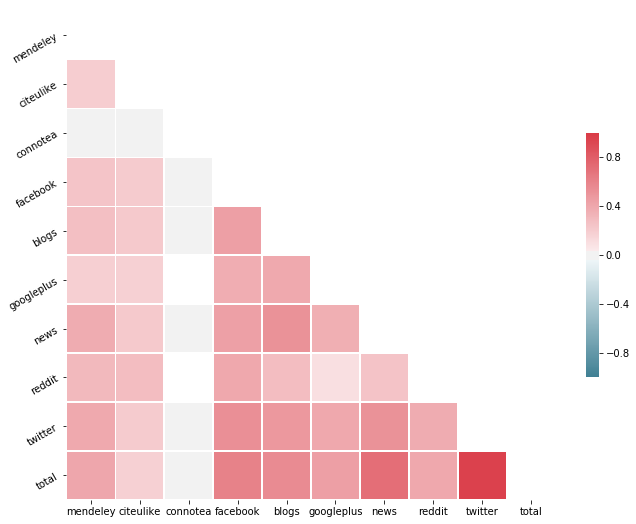

In [6]:
corr = df[readers+posts].corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_yticklabels(ax.get_yticklabels(), rotation=30);

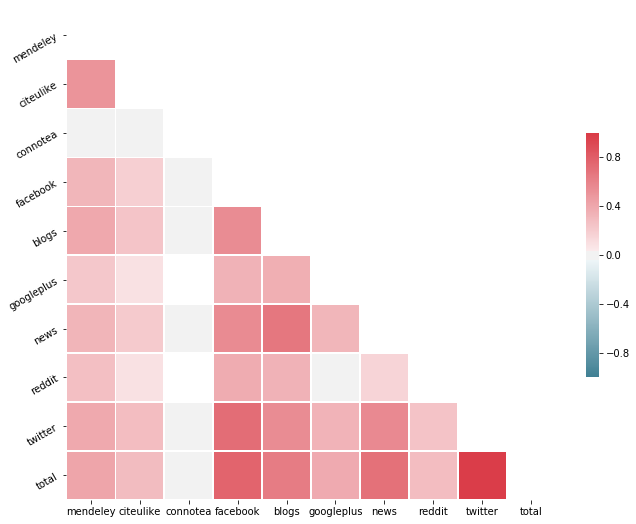

In [7]:
corr = df[readers+posts].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_yticklabels(ax.get_yticklabels(), rotation=30);